# NumPy

Pandas is heavily reliant on data structures from the NumPy library. So it's helpful to have a little understanding of NumPy before diving into Pandas. 

NumPy (short for numeric Python) is the cornerstone toolbox for scientific computing with Python. Most importantly, NumPy provides the `array` datatype.

## Creating an Array

Import the numpy library and call it `np` for short.

In [1]:
import numpy as np

Create a list called `x` and another list `y`.

In [2]:
x = [10, 20, 30, 40]
y = [100, 200, 300, 400]

Let's say we want to sum the contents two lists. Using the addition operator does **not** return the desired result. We want to sum items element-wise, but using the addition operator on two lists concatenates them instead (even if they contain numbers!).

In [3]:
x + y

[10, 20, 30, 40, 100, 200, 300, 400]

Instead, let's convert these two lists into numpy arrays so we can work with them more easily.

In [4]:
x = np.array(x)

In [5]:
y = np.array(y)

Confirm the type.

In [6]:
type(x)

numpy.ndarray

## Arithmetic Operations

Now we can sum them and produce the desired result, adding the arrays element-wise.

In [7]:
x + y

array([110, 220, 330, 440])

We can also use other mathematical operators.

In [8]:
x - y

array([ -90, -180, -270, -360])

In [9]:
x * y

array([ 1000,  4000,  9000, 16000])

In [10]:
x / y

array([0.1, 0.1, 0.1, 0.1])

## Indexing an Array

Indexing works the same with arrays is it does with lists. The $i^{th}$ value can be accessed by specifying the desired index in square brackets, just as with Python lists. Counting starts at zero with both arrays and lists.

In [11]:
x[0]

10

In [12]:
y[1:3]

array([200, 300])

In [13]:
y[-1]

400

## Summary Statistics

Often when faced with a large amount of data, a first step is to compute summary statistics for the data in question. Perhaps the most common summary statistics are the mean and standard deviation, which allow you to summarize the "typical" values in a dataset, but other aggregates are useful as well (the sum, product, median, minimum and maximum, quantiles, etc.).

In [14]:
# Calculate the sum of all elements in the array
np.sum(x)

100

In [15]:
# Alternately, you can use
x.sum()

100

In [16]:
np.min(x)

10

In [17]:
np.max(x)

40

In [18]:
# Calculate the average, or mean
np.mean(x)

25.0

In [19]:
# Calculate the median
np.median(x)

25.0

In [20]:
# Calculate the standard deviation
np.std(x)

11.180339887498949

## Reshaping an Array

In [21]:
x.reshape(2,2)

array([[10, 20],
       [30, 40]])

In [22]:
y.reshape(4,)

array([100, 200, 300, 400])

In [23]:
y.reshape(4,1)

array([[100],
       [200],
       [300],
       [400]])

# Pandas

Pandas is a Python library for data analysis. It provides two useful data structures: `Series` and `DataFrame`.

Import the pandas library. It is customary to name it `pd` for short.

In [24]:
import pandas as pd

## Series

A Series is a one-dimensional array of indexed data. It is similar to and based on arrays. A Series can be created from a list or an array of values. It contains both a sequence of values and indices. Unlike arrays, the index is flexible, meaning it can take values other than just 0, 1, 2, etc.

Create a Series.

In [25]:
x = pd.Series([0.25, 0.5, 0.75, 1.0])

In [26]:
x

0    0.25
1    0.50
2    0.75
3    1.00
dtype: float64

### Indexing

Notice how the index will automatically take on values of 0, 1, 2, etc.

The index is actually its own special data type. We can call it directly with: `.index`

In [27]:
x.index

RangeIndex(start=0, stop=4, step=1)

In [28]:
list(x.index)

[0, 1, 2, 3]

We can select items by the index using square bracket notation.

In [29]:
x[0]

0.25

In [30]:
x[1]

0.5

However, we are not limited to indices with just sequential numbers. With a `Series`, the index can be anything.

Create a Series with a non-numeric index.

In [31]:
x = pd.Series([0.25, 0.5, 0.75, 1.0], index=['a', 'b', 'c', 'd'])

In [32]:
x

a    0.25
b    0.50
c    0.75
d    1.00
dtype: float64

In [33]:
x['a']

0.25

In [34]:
x['b']

0.5

In [35]:
# fancy indexing
x[['a', 'd']]

a    0.25
d    1.00
dtype: float64

In this sense, a `Series` can be used like a dictionary, in the sense that there are key-value pairs.

We can use dictionary-like notation to check if an element exists within the index of a `Series`.

In [36]:
'a' in x

True

In [37]:
x.keys()

Index(['a', 'b', 'c', 'd'], dtype='object')

In [38]:
list(x.items())

[('a', 0.25), ('b', 0.5), ('c', 0.75), ('d', 1.0)]

### Adding items to a Series

Series objects can even be modified with a dictionary-like syntax. 

Just as you can extend a dictionary by assigning to a new key, you can extend a Series by assigning to a new index value:

In [39]:
x['e'] = 1.25

In [40]:
x

a    0.25
b    0.50
c    0.75
d    1.00
e    1.25
dtype: float64

### Slicing

In [41]:
# slicing by explicit index
x['a':'c']

a    0.25
b    0.50
c    0.75
dtype: float64

In [42]:
# slicing by implicit integer index
x[0:2]

a    0.25
b    0.50
dtype: float64

### Booleans

In [43]:
x > 0.3

a    False
b     True
c     True
d     True
e     True
dtype: bool

In [44]:
x < 0.8

a     True
b     True
c     True
d    False
e    False
dtype: bool

### Masking

In [45]:
# masking
x[(x > 0.3) & (x < 0.8)]

b    0.50
c    0.75
dtype: float64

### `.loc` vs `.iloc`

The `.loc` attribute allows indexing and slicing that always references the explicit index.

In [46]:
x.loc['a']

0.25

The `.iloc` attribute allows indexing and slicing that always references the implicit Python-style index:

In [47]:
x.iloc[0]

0.25

In [48]:
x.iloc[1:3]

b    0.50
c    0.75
dtype: float64

## DataFrame

A `DataFrame` acts like a two-dimensional or structured array, and in other ways like a dictionary of `Series` structures sharing the same index.

### Creating a DataFrame

Let's construct a `DataFrame` from two `Series`.

In [49]:
# Contains the population of each state

population_dict = {'California': 38332521,
                   'Texas': 26448193,
                   'New York': 19651127,
                   'Florida': 19552860,
                   'Illinois': 12882135}

population = pd.Series(population_dict)

In [50]:
population

California    38332521
Texas         26448193
New York      19651127
Florida       19552860
Illinois      12882135
dtype: int64

In [51]:
# Contains the area of each state in Square Kilometers

area_dict = {'California': 423967, 'Texas': 695662, 'New York': 141297,
             'Florida': 170312, 'Illinois': 149995}

area = pd.Series(area_dict)

In [52]:
area

California    423967
Texas         695662
New York      141297
Florida       170312
Illinois      149995
dtype: int64

In [53]:
# Create a DataFrame

df = pd.DataFrame({'population': population, 'area': area})

In [54]:
df

,population,area
California,38332521,423967
Texas,26448193,695662
New York,19651127,141297
Florida,19552860,170312
Illinois,12882135,149995


### Indexing

Like the `Series` object, the `DataFrame` has an index attribute that gives access to the index labels:

In [55]:
df.index

Index(['California', 'Texas', 'New York', 'Florida', 'Illinois'], dtype='object')

Explicit-style indexing with `.loc`

In [56]:
df.loc['California']

population    38332521
area            423967
Name: California, dtype: int64

Implicit-style indexing with `.iloc`

In [57]:
df.iloc[0]

population    38332521
area            423967
Name: California, dtype: int64

### Column Names

Additionally, the `DataFrame` has a columns attribute, which is an `Index` object holding the column labels:

In [58]:
df.columns

Index(['population', 'area'], dtype='object')

### Column Selection

We can select a particular column using the familiar square bracket notation.

In [59]:
df['population']

California    38332521
Texas         26448193
New York      19651127
Florida       19552860
Illinois      12882135
Name: population, dtype: int64

In [60]:
df['area']

California    423967
Texas         695662
New York      141297
Florida       170312
Illinois      149995
Name: area, dtype: int64

### Column Creation

We can create a new column with square bracket notation and simple assignment, like such:

In [61]:
df['test'] = 0

In [62]:
df

,population,area,test
California,38332521,423967,0
Texas,26448193,695662,0
New York,19651127,141297,0
Florida,19552860,170312,0
Illinois,12882135,149995,0


### Deleting a Column

Let's delete the test column that we just created.

In [63]:
del df['test']

In [64]:
df

,population,area
California,38332521,423967
Texas,26448193,695662
New York,19651127,141297
Florida,19552860,170312
Illinois,12882135,149995


### Arithmetic Operations

Since each column in a `DataFrame` is a `Series`, we can do the usual arithmetic operations on columns as we would on a series.

In [65]:
# Addition
df['population'] + df['population']

California    76665042
Texas         52896386
New York      39302254
Florida       39105720
Illinois      25764270
Name: population, dtype: int64

In [66]:
# Multiplication
df['population'] * 1000

California    38332521000
Texas         26448193000
New York      19651127000
Florida       19552860000
Illinois      12882135000
Name: population, dtype: int64

Let's create a new column of population density, by dividing the population of each state by the area (in square kilometers).

In [67]:
# Create a new population density column
df['pop_density'] = df['population'] / df['area']

In [68]:
df

,population,area,pop_density
California,38332521,423967,90.413926
Texas,26448193,695662,38.018740
New York,19651127,141297,139.076746
Florida,19552860,170312,114.806121
Illinois,12882135,149995,85.883763


### Sorting a DataFrame

Which state has the highest population density? Rank the table above by `pop_density` in descending order.

In [69]:
df.sort_values(by='pop_density', ascending=False)

,population,area,pop_density
New York,19651127,141297,139.076746
Florida,19552860,170312,114.806121
California,38332521,423967,90.413926
Illinois,12882135,149995,85.883763
Texas,26448193,695662,38.018740


We can even plot this directly from Pandas! We will come back to visualization next time.

In [70]:
# Importing seaborn for nicer looking charts
import seaborn as sns

# Setting default figure size
sns.set(rc = {'figure.figsize':(12,6)})

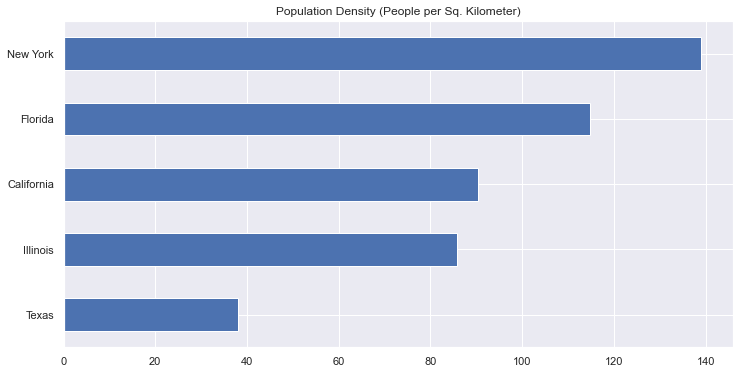

In [71]:
df.sort_values(by='pop_density')['pop_density'].plot(kind='barh', title='Population Density (People per Sq. Kilometer)');

## Reading Data

Pandas offers a plethora of functions to read various data formats into a `DataFrame`. All of these functions start with `read_`.

### Read a CSV

Read in a CSV that lives at a URL on the internet.

Source: https://www1.nyc.gov/site/tlc/about/aggregated-reports.page

In [72]:
url = "https://www1.nyc.gov/assets/tlc/downloads/csv/data_reports_monthly.csv"

In [73]:
data = pd.read_csv(url)

Use the `.head()` command to view the first five rows.

In [74]:
data.head()

,Month/Year,License Class,Trips Per Day,Farebox Per Day,Unique Drivers,Unique Vehicles,Vehicles Per Day,Avg Days Vehicles on Road,Avg Hours Per Day Per Vehicle,Avg Days Drivers on Road,Avg Hours Per Day Per Driver,Avg Minutes Per Trip,Percent of Trips Paid with Credit Card,Trips Per Day Shared
0,2021-12,Yellow,"103,585","1,903,870","9,552","6,908","5,657",25.4,9.0,21.5,7.7,15.2,77%,0
1,2021-12,FHV - High Volume,"517,884",-,"70,302","68,257","44,289",20.1,6.4,19.8,6.3,18.0,-,0
2,2021-12,Green,"3,223","70,840","1,299","1,232",705,17.8,3.6,17.1,3.6,19.5,69%,0
3,2021-11,FHV - Black Car,"11,915",-,"5,048","4,917","2,260",13.8,4.0,13.7,4.0,27.0,-,-
4,2021-11,FHV - Livery,"24,410",-,"5,121","4,962","3,214",19.4,5.1,19.2,5.0,18.0,-,-


See the shape of this table with `.shape` which returns the number of rows and columns (num rows, num columns):

In [75]:
data.shape

(578, 14)

### Read an Excel file

Source: https://github.com/bharathirajatut/sample-excel-dataset

In [76]:
url = "https://github.com/bharathirajatut/sample-excel-dataset/blob/master/airline.xls?raw=true"

In [77]:
data = pd.read_excel(url, engine='xlrd')

In [78]:
data.head()

,YEAR,Y,W,R,L,K
0,1948,1.214,0.243,0.1454,1.415,0.612
1,1949,1.354,0.260,0.2181,1.384,0.559
2,1950,1.569,0.278,0.3157,1.388,0.573
3,1951,1.948,0.297,0.3940,1.550,0.564
4,1952,2.265,0.310,0.3559,1.802,0.574


### Read from Clipboard

Practice reading data with `read_clipboard()`. Go to [here](https://geodacenter.github.io/data-and-lab/nyc/) and copy the table of variable definitions.

In [80]:
pd.read_clipboard()

,Variable,Description,Source,
0,code,NYC Sub-Borough Neighborhood unique ID,,
1,subborough,NYC Sub-Borough Neighborhood name,,
2,forhis06-09,"Percentage of hispanic population, not born in US",New York City Neighborhood Information by Furm...,
3,forwh06-09,"Percentage of white population, not born in US",same as above,
4,hhsiz1990,Average number of people per household,"United States Census (2000), New York City Hou...",
5,hhsiz00,Average number of people per household,see above,
6,hhsiz02-05-08,Average number of people per household,see above,
7,"kids2000, kids2005-2009",Percentage households w kids under 18,"United States Census (2000), American Communit...",
8,"rent2002,2005,2008",Median monthly contract rent,New York City Housing and Vacancy Survey,
9,"rentpct02,05,08",Percentage of housing stock that is market rat...,New York City Housing and Vacancy Survey.,


### Reading Zipped Data

Sometimes, you will encounter compressed or zipped data and you may need to unzip it in order read it.

#### Example: CitiBike Trip Data

Source: https://ride.citibikenyc.com/system-data

Here is a function to uncompress a zipped CSV, open it and read it into a `DataFrame`.

In [82]:
# Function to read in a zipped file url and specified csv filename
# It reads the url into a ZipFile, opens the file, reads it into a dataframe, and returns the dataframe

def read_zipped_csv(url, filename=False):
    from zipfile import ZipFile
    from io import BytesIO
    from urllib.request import urlopen

    r = urlopen(url).read()
    b = BytesIO(r)
    file = ZipFile(b)
    if not filename:        
        filename = url.split("/")[-1].replace(".zip","")
    data = file.open(filename)
    df = pd.read_csv(data)
    return df

In [83]:
url = "https://s3.amazonaws.com/tripdata/202112-citibike-tripdata.csv.zip"

In [84]:
df = read_zipped_csv(url)

/var/folders/0w/knjlywtd3_72xp9lvfjlmby80000gn/T/ipykernel_99586/609798831.py:15: DtypeWarning: Columns (5,7) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(data)


In [85]:
df.head()

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
0,7AE6209F17967FF2,classic_bike,2021-12-07 08:54:24,2021-12-07 08:59:46,Broadway & Hancock St,4441.06,Lewis Ave & Madison St,4425.02,40.686630,-73.916800,40.686312,-73.935775,member
1,CCE209B6D683C96A,classic_bike,2021-12-13 21:22:35,2021-12-13 21:31:24,S 4 St & Wythe Ave,5204.05,Metropolitan Ave & Meeker Ave,5300.05,40.712859,-73.965903,40.714133,-73.952344,member
2,333961DE681551DA,classic_bike,2021-12-17 22:21:56,2021-12-17 22:30:41,6 Ave & Canal St,5500.07,University Pl & E 14 St,5905.14,40.722438,-74.005664,40.734814,-73.992085,member
3,E5F6240DEF91E399,classic_bike,2021-12-13 17:44:19,2021-12-13 17:51:35,E 2 St & Avenue C,5476.03,E 11 St & 3 Ave,5788.16,40.720874,-73.980858,40.731270,-73.988490,member
4,B93587D5FA305113,classic_bike,2021-12-04 16:03:04,2021-12-04 16:06:47,Columbia St & Degraw St,4422.04,Atlantic Ave & Furman St,4614.04,40.685930,-74.002424,40.691652,-73.999979,member


## Selecting and slicing data from a DataFrame

Let's work with the Citibike trip data to practice selecting data.

Read and unzip the data.

In [86]:
url = "https://s3.amazonaws.com/tripdata/202010-citibike-tripdata.csv.zip"

In [87]:
trips = read_zipped_csv(url)

View the first five rows.

In [88]:
trips.head()

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender
0,1403,2020-10-01 00:00:10.7870,2020-10-01 00:23:34.5400,224,Spruce St & Nassau St,40.711464,-74.005524,3347,Van Brunt St & Wolcott St,40.677343,-74.012751,39079,Subscriber,1995,1
1,462,2020-10-01 00:00:18.2390,2020-10-01 00:08:00.5710,3161,W 76 St & Columbus Ave,40.780184,-73.977285,3158,W 63 St & Broadway,40.771639,-73.982614,41267,Subscriber,1998,2
2,770,2020-10-01 00:00:21.3070,2020-10-01 00:13:12.0840,354,Emerson Pl & Myrtle Ave,40.693631,-73.962236,3761,Cedar St & Myrtle Ave,40.697842,-73.926241,47398,Customer,1996,1
3,233,2020-10-01 00:00:25.0080,2020-10-01 00:04:18.6410,3141,1 Ave & E 68 St,40.765005,-73.958185,464,E 56 St & 3 Ave,40.759345,-73.967597,36482,Subscriber,1993,1
4,126,2020-10-01 00:00:25.3100,2020-10-01 00:02:32.1330,335,Washington Pl & Broadway,40.729039,-73.994046,229,Great Jones St,40.727434,-73.993790,45319,Subscriber,1989,1


You can select a single column using single bracket notation:

In [89]:
# select a single column by column name
# this is a pandas series
trips['starttime']

0          2020-10-01 00:00:10.7870
1          2020-10-01 00:00:18.2390
2          2020-10-01 00:00:21.3070
3          2020-10-01 00:00:25.0080
4          2020-10-01 00:00:25.3100
                     ...           
2248864    2020-10-31 23:59:48.4470
2248865    2020-10-31 23:59:49.3770
2248866    2020-10-31 23:59:52.1040
2248867    2020-10-31 23:59:53.0290
2248868    2020-10-31 23:59:57.9770
Name: starttime, Length: 2248869, dtype: object

In [90]:
# select multiple columns by a list of column names
# this is a pandas dataframe that is a subset of the original
trips[['usertype', 'tripduration']]

,usertype,tripduration
0,Subscriber,1403
1,Subscriber,462
2,Customer,770
3,Subscriber,233
4,Subscriber,126
...,...,...
2248864,Customer,1120
2248865,Customer,859
2248866,Subscriber,546
2248867,Subscriber,748


In [91]:
trips.head()

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender
0,1403,2020-10-01 00:00:10.7870,2020-10-01 00:23:34.5400,224,Spruce St & Nassau St,40.711464,-74.005524,3347,Van Brunt St & Wolcott St,40.677343,-74.012751,39079,Subscriber,1995,1
1,462,2020-10-01 00:00:18.2390,2020-10-01 00:08:00.5710,3161,W 76 St & Columbus Ave,40.780184,-73.977285,3158,W 63 St & Broadway,40.771639,-73.982614,41267,Subscriber,1998,2
2,770,2020-10-01 00:00:21.3070,2020-10-01 00:13:12.0840,354,Emerson Pl & Myrtle Ave,40.693631,-73.962236,3761,Cedar St & Myrtle Ave,40.697842,-73.926241,47398,Customer,1996,1
3,233,2020-10-01 00:00:25.0080,2020-10-01 00:04:18.6410,3141,1 Ave & E 68 St,40.765005,-73.958185,464,E 56 St & 3 Ave,40.759345,-73.967597,36482,Subscriber,1993,1
4,126,2020-10-01 00:00:25.3100,2020-10-01 00:02:32.1330,335,Washington Pl & Broadway,40.729039,-73.994046,229,Great Jones St,40.727434,-73.993790,45319,Subscriber,1989,1


In [92]:
# create a new column by assigning df['new_col'] to some set of values
# you can do math operations on any numeric columns

# trip duration is currentlty in seconds
# lets create a new column containing duration in minutes
trips["tripduration_mins"] = trips["tripduration"] / 60

In [93]:
# inspect the results
trips[["tripduration","tripduration_mins"]].head()

,tripduration,tripduration_mins
0,1403,23.383333
1,462,7.700000
2,770,12.833333
3,233,3.883333
4,126,2.100000


You can select several columns by passing a list of columns into the square bracket notation:

In [94]:
trips[['starttime', 'stoptime', 'usertype']]

,starttime,stoptime,usertype
0,2020-10-01 00:00:10.7870,2020-10-01 00:23:34.5400,Subscriber
1,2020-10-01 00:00:18.2390,2020-10-01 00:08:00.5710,Subscriber
2,2020-10-01 00:00:21.3070,2020-10-01 00:13:12.0840,Customer
3,2020-10-01 00:00:25.0080,2020-10-01 00:04:18.6410,Subscriber
4,2020-10-01 00:00:25.3100,2020-10-01 00:02:32.1330,Subscriber
...,...,...,...
2248864,2020-10-31 23:59:48.4470,2020-11-01 00:18:29.3280,Customer
2248865,2020-10-31 23:59:49.3770,2020-11-01 00:14:09.1920,Customer
2248866,2020-10-31 23:59:52.1040,2020-11-01 00:08:59.0710,Subscriber
2248867,2020-10-31 23:59:53.0290,2020-11-01 00:12:21.7830,Subscriber


What are the user type categories?

In [95]:
trips['usertype'].unique()

array(['Subscriber', 'Customer'], dtype=object)

How many trips for each user type category?

In [96]:
trips['usertype'].value_counts()

Subscriber    1702115
Customer       546754
Name: usertype, dtype: int64

### Select (Filter) by Value

We can use square bracket notation to select the rows in `trips` where `trips['usertype'] == 'Subscriber'`.

In [97]:
subscriber_trips = trips[trips['usertype'] == 'Subscriber']

In [98]:
subscriber_trips.head()

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender,tripduration_mins
0,1403,2020-10-01 00:00:10.7870,2020-10-01 00:23:34.5400,224,Spruce St & Nassau St,40.711464,-74.005524,3347,Van Brunt St & Wolcott St,40.677343,-74.012751,39079,Subscriber,1995,1,23.383333
1,462,2020-10-01 00:00:18.2390,2020-10-01 00:08:00.5710,3161,W 76 St & Columbus Ave,40.780184,-73.977285,3158,W 63 St & Broadway,40.771639,-73.982614,41267,Subscriber,1998,2,7.700000
3,233,2020-10-01 00:00:25.0080,2020-10-01 00:04:18.6410,3141,1 Ave & E 68 St,40.765005,-73.958185,464,E 56 St & 3 Ave,40.759345,-73.967597,36482,Subscriber,1993,1,3.883333
4,126,2020-10-01 00:00:25.3100,2020-10-01 00:02:32.1330,335,Washington Pl & Broadway,40.729039,-73.994046,229,Great Jones St,40.727434,-73.993790,45319,Subscriber,1989,1,2.100000
7,523,2020-10-01 00:00:41.0760,2020-10-01 00:09:24.7550,3435,Grand St & Elizabeth St,40.718822,-73.995960,3435,Grand St & Elizabeth St,40.718822,-73.995960,45297,Subscriber,1980,1,8.716667


Alternately, you can use `query()` function to select a subset of rows:

In [99]:
subscriber_trips = trips.query("usertype == 'Subscriber'")

In [100]:
subscriber_trips.head()

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender,tripduration_mins
0,1403,2020-10-01 00:00:10.7870,2020-10-01 00:23:34.5400,224,Spruce St & Nassau St,40.711464,-74.005524,3347,Van Brunt St & Wolcott St,40.677343,-74.012751,39079,Subscriber,1995,1,23.383333
1,462,2020-10-01 00:00:18.2390,2020-10-01 00:08:00.5710,3161,W 76 St & Columbus Ave,40.780184,-73.977285,3158,W 63 St & Broadway,40.771639,-73.982614,41267,Subscriber,1998,2,7.700000
3,233,2020-10-01 00:00:25.0080,2020-10-01 00:04:18.6410,3141,1 Ave & E 68 St,40.765005,-73.958185,464,E 56 St & 3 Ave,40.759345,-73.967597,36482,Subscriber,1993,1,3.883333
4,126,2020-10-01 00:00:25.3100,2020-10-01 00:02:32.1330,335,Washington Pl & Broadway,40.729039,-73.994046,229,Great Jones St,40.727434,-73.993790,45319,Subscriber,1989,1,2.100000
7,523,2020-10-01 00:00:41.0760,2020-10-01 00:09:24.7550,3435,Grand St & Elizabeth St,40.718822,-73.995960,3435,Grand St & Elizabeth St,40.718822,-73.995960,45297,Subscriber,1980,1,8.716667


### Masks

You can think of conditions like "masks" containing boolean values resulting from a comparison operator.

In [101]:
mask = (trips["usertype"] == 'Subscriber')

In [102]:
mask

0           True
1           True
2          False
3           True
4           True
           ...  
2248864    False
2248865    False
2248866     True
2248867     True
2248868     True
Name: usertype, Length: 2248869, dtype: bool

You can use masks to select a subset of rows from a `DataFrame` where the masked value is `True`.

In [103]:
print(len(trips[mask]), "Subscriber Trips")

1702115 Subscriber Trips


You can select the inverse of a mask using the `~` tilde operator to negate the mask.

In [104]:
print(len(trips[~mask]), "Not Subscriber Trips")

546754 Not Subscriber Trips


## Cleaning Data

Do the trip durations seem reasonable?

The trip duration values are in seconds; let's make them easier to read by converting them to minutes.

In [105]:
trips['tripduration_mins'] = trips['tripduration'] / 60

In [106]:
trips['tripduration_mins'].describe().astype(int)

count    2248869
mean          20
std          200
min            1
25%            7
50%           12
75%           21
max        37428
Name: tripduration_mins, dtype: int64

The mean trip duration is 20 minutes, and the median is 12 minutes. This is noteable that the mean is almost twice is long as the median, implying that there must be some large outliers that are bringing up the average. Looking at the maximum value of 37,000+ minutes, we see that this is clearly an outlier.

Let's find the 90th, 95th and 99th percentile for the trip durations column using `quantile()`.

In [107]:
trips['tripduration_mins'].quantile(0.9)

33.55

In [108]:
trips['tripduration_mins'].quantile(0.95)

42.233333333333334

In [109]:
trips['tripduration_mins'].quantile(0.99)

78.6

In [110]:
trips['tripduration_mins'].quantile(0.999)

399.0078000001764

Let's only keep the trips which are longer than 5 minutes and shorter than 3 hours.

In [111]:
trips = trips.query("tripduration_mins >= 5 and tripduration_mins <= 180")

In [112]:
trips['tripduration_mins'].describe().astype(int)

count    1924868
mean          18
std           14
min            5
25%            9
50%           14
75%           23
max          179
Name: tripduration_mins, dtype: int64

Do the birth years make sense?

In [113]:
trips['birth year'].describe().astype(int)

count    1924868
mean        1981
std           12
min         1885
25%         1969
50%         1985
75%         1992
max         2004
Name: birth year, dtype: int64

Make a histogram of birth years.

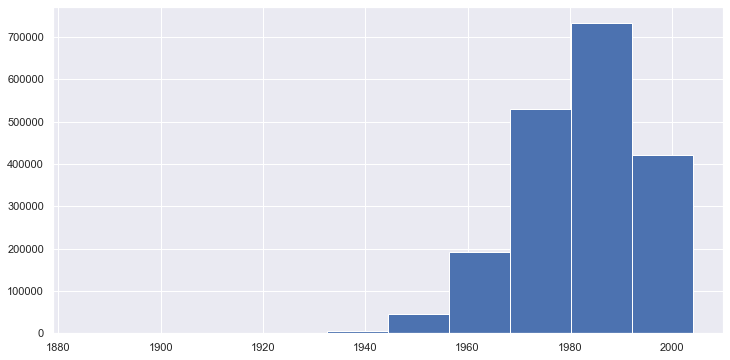

In [114]:
trips['birth year'].hist();

You can see there are some users with stated birth year in 1880, 1900, 1920, etc. We will handle this shortly.

There is also an issue that becomes apparent when you view the same data on a histogram with smaller bins...

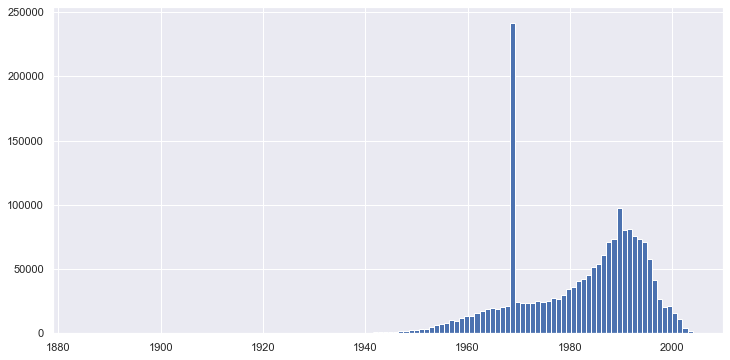

In [115]:
trips['birth year'].hist(bins=120);

## Wrangle the Data

View the data types.

In [116]:
trips.dtypes

tripduration                 int64
starttime                   object
stoptime                    object
start station id             int64
start station name          object
start station latitude     float64
start station longitude    float64
end station id               int64
end station name            object
end station latitude       float64
end station longitude      float64
bikeid                       int64
usertype                    object
birth year                   int64
gender                       int64
tripduration_mins          float64
dtype: object

Convert `starttime` and `stoptime` into DateTime values.

In [117]:
trips['starttime'] = pd.to_datetime(trips['starttime'])
trips['stoptime'] = pd.to_datetime(trips['stoptime'])

Create `dayname` columns for both the `starttime` and `stoptime`.

We will use a [lambda](https://www.w3schools.com/python/python_lambda.asp) function, which is a small anonymous function that is defined on the fly and can be applied simultaneously to all rows in a column.

In [118]:
trips['starttime_dayname'] = trips['starttime'].apply(lambda x: x.day_name())

In [119]:
trips['stoptime_dayname'] = trips['stoptime'].apply(lambda x: x.day_name())

Create `hour` columns for both the `starttime` and `stoptime`.

In [120]:
trips['starttime_hour'] = trips['starttime'].apply(lambda x: x.hour)

In [121]:
trips['stoptime_hour'] = trips['stoptime'].apply(lambda x: x.hour)

Replace the values in the `gender` column with their labels. `Zero=unknown; 1=male; 2=female`

In [122]:
gender_labels = {0: "unknown", 1: "male", 2: "female"}

In [123]:
trips['gender'] = trips['gender'].apply(lambda x: gender_labels[x])

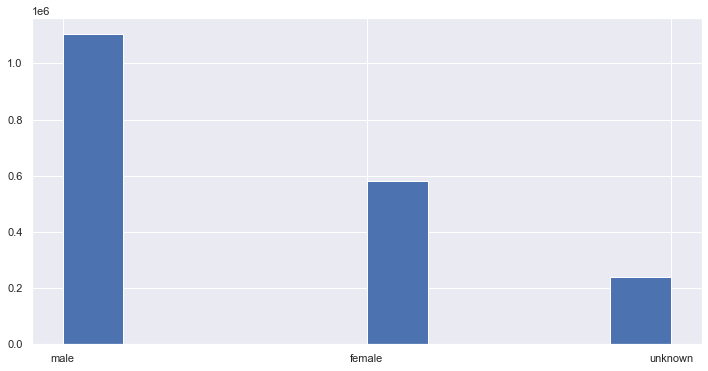

In [124]:
trips['gender'].hist();

Create an `age` column.

In [125]:
current_year = trips['starttime'].min().year

In [126]:
trips['age'] = current_year - trips['birth year']

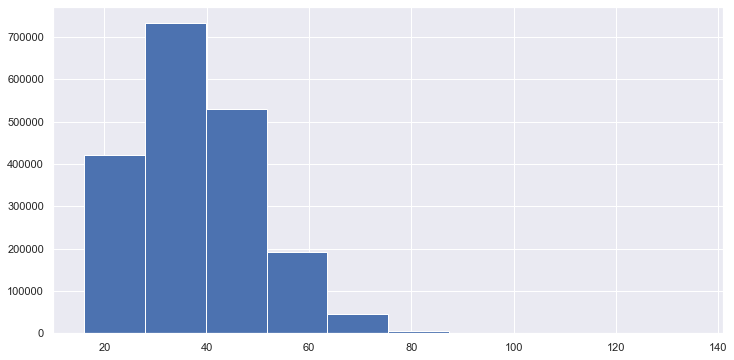

In [127]:
trips['age'].hist();

Only keep trips from users with age between 16 years and 100 years.

In [128]:
trips = trips.query("age >= 16 and age <= 100")

In [129]:
trips.head()

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,...,bikeid,usertype,birth year,gender,tripduration_mins,starttime_dayname,stoptime_dayname,starttime_hour,stoptime_hour,age
0,1403,2020-10-01 00:00:10.787,2020-10-01 00:23:34.540,224,Spruce St & Nassau St,40.711464,-74.005524,3347,Van Brunt St & Wolcott St,40.677343,...,39079,Subscriber,1995,male,23.383333,Thursday,Thursday,0,0,25
1,462,2020-10-01 00:00:18.239,2020-10-01 00:08:00.571,3161,W 76 St & Columbus Ave,40.780184,-73.977285,3158,W 63 St & Broadway,40.771639,...,41267,Subscriber,1998,female,7.700000,Thursday,Thursday,0,0,22
2,770,2020-10-01 00:00:21.307,2020-10-01 00:13:12.084,354,Emerson Pl & Myrtle Ave,40.693631,-73.962236,3761,Cedar St & Myrtle Ave,40.697842,...,47398,Customer,1996,male,12.833333,Thursday,Thursday,0,0,24
5,1632,2020-10-01 00:00:32.659,2020-10-01 00:27:45.243,502,Henry St & Grand St,40.714211,-73.981095,502,Henry St & Grand St,40.714211,...,36602,Customer,1969,unknown,27.200000,Thursday,Thursday,0,0,51
7,523,2020-10-01 00:00:41.076,2020-10-01 00:09:24.755,3435,Grand St & Elizabeth St,40.718822,-73.995960,3435,Grand St & Elizabeth St,40.718822,...,45297,Subscriber,1980,male,8.716667,Thursday,Thursday,0,0,40


Reset the index.

In [130]:
trips = trips.reset_index()

In [131]:
trips.head()

,index,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,...,bikeid,usertype,birth year,gender,tripduration_mins,starttime_dayname,stoptime_dayname,starttime_hour,stoptime_hour,age
0,0,1403,2020-10-01 00:00:10.787,2020-10-01 00:23:34.540,224,Spruce St & Nassau St,40.711464,-74.005524,3347,Van Brunt St & Wolcott St,...,39079,Subscriber,1995,male,23.383333,Thursday,Thursday,0,0,25
1,1,462,2020-10-01 00:00:18.239,2020-10-01 00:08:00.571,3161,W 76 St & Columbus Ave,40.780184,-73.977285,3158,W 63 St & Broadway,...,41267,Subscriber,1998,female,7.700000,Thursday,Thursday,0,0,22
2,2,770,2020-10-01 00:00:21.307,2020-10-01 00:13:12.084,354,Emerson Pl & Myrtle Ave,40.693631,-73.962236,3761,Cedar St & Myrtle Ave,...,47398,Customer,1996,male,12.833333,Thursday,Thursday,0,0,24
3,5,1632,2020-10-01 00:00:32.659,2020-10-01 00:27:45.243,502,Henry St & Grand St,40.714211,-73.981095,502,Henry St & Grand St,...,36602,Customer,1969,unknown,27.200000,Thursday,Thursday,0,0,51
4,7,523,2020-10-01 00:00:41.076,2020-10-01 00:09:24.755,3435,Grand St & Elizabeth St,40.718822,-73.995960,3435,Grand St & Elizabeth St,...,45297,Subscriber,1980,male,8.716667,Thursday,Thursday,0,0,40


## Grouping Data

How many trips are from Subscribers vs. Customers?

Group the trips by `usertype` and count how many trips are in each category using `groupby()` and `size()`. We can chain these functions together.

In [132]:
trips.groupby('usertype').size()

usertype
Customer       513826
Subscriber    1410235
dtype: int64

What percentage of total trips come from Subscribers vs. Customers?

In [133]:
trips.groupby('usertype').size() / len(trips)

usertype
Customer      0.267053
Subscriber    0.732947
dtype: float64

What is the average trip duration by gender?

In [134]:
trips.groupby('gender').mean()['tripduration']

gender
female     1160.720358
male       1053.711042
unknown    1384.207972
Name: tripduration, dtype: float64

The following table summarizes the built-in Pandas aggregations:


| Aggregation              | Description                     |
|--------------------------|---------------------------------|
| ``count()``              | Total number of items           |
| ``first()``, ``last()``  | First and last item             |
| ``mean()``, ``median()`` | Mean and median                 |
| ``min()``, ``max()``     | Minimum and maximum             |
| ``std()``, ``var()``     | Standard deviation and variance |
| ``mad()``                | Mean absolute deviation         |
| ``prod()``               | Product of all items            |
| ``sum()``                | Sum of all items                |

These are all methods of ``DataFrame`` and ``Series`` objects."

## Merging Data

Practice merges using examples from [Python Data Science Handbook](https://github.com/jakevdp/PythonDataScienceHandbook/blob/master/notebooks/03.07-Merge-and-Join.ipynb).

In [135]:
df1 = pd.DataFrame({'employee': ['Bob', 'Jake', 'Lisa', 'Sue'],
                    'group': ['Accounting', 'Engineering', 'Engineering', 'HR']})
df2 = pd.DataFrame({'employee': ['Lisa', 'Bob', 'Jake', 'Sue'],
                    'hire_date': [2004, 2008, 2012, 2014]})

In [136]:
df1

,employee,group
0,Bob,Accounting
1,Jake,Engineering
2,Lisa,Engineering
3,Sue,HR


In [137]:
df2

,employee,hire_date
0,Lisa,2004
1,Bob,2008
2,Jake,2012
3,Sue,2014


### One to One joins

In one-to-one joins, the key column in both datasets is unique.

In [138]:
df3 = pd.merge(df1, df2, how='left', on='employee')

In [139]:
df3

,employee,group,hire_date
0,Bob,Accounting,2008
1,Jake,Engineering,2012
2,Lisa,Engineering,2004
3,Sue,HR,2014


### One to Many Joins

In one-to-many joins, one of the key columns contains duplicate entries.

In [140]:
df3

,employee,group,hire_date
0,Bob,Accounting,2008
1,Jake,Engineering,2012
2,Lisa,Engineering,2004
3,Sue,HR,2014


In [141]:
df4 = pd.DataFrame({'group': ['Accounting', 'Engineering', 'HR'],
                    'supervisor': ['Carly', 'Guido', 'Steve']})

In [142]:
df4

,group,supervisor
0,Accounting,Carly
1,Engineering,Guido
2,HR,Steve


Join `df3` and `df4` on and the `group` column. Notice that `group` contains duplicate entries in `df3`.

In [143]:
pd.merge(df3, df4, how='left', on='group')

,employee,group,hire_date,supervisor
0,Bob,Accounting,2008,Carly
1,Jake,Engineering,2012,Guido
2,Lisa,Engineering,2004,Guido
3,Sue,HR,2014,Steve


### Many to Many Joins

In many-to-many joins, both of the key columns contains duplicate entries.

In [144]:
df1

,employee,group
0,Bob,Accounting
1,Jake,Engineering
2,Lisa,Engineering
3,Sue,HR


In [145]:
df5 = pd.DataFrame({'group': ['Accounting', 'Accounting',
                              'Engineering', 'Engineering', 'HR', 'HR'],
                    'skills': ['math', 'spreadsheets', 'coding', 'linux',
                               'spreadsheets', 'organization']})

In [146]:
df5

,group,skills
0,Accounting,math
1,Accounting,spreadsheets
2,Engineering,coding
3,Engineering,linux
4,HR,spreadsheets
5,HR,organization


Join `df1` and `df5` based on `group`. Note that `group` contains duplicates on both sides.

In [147]:
pd.merge(df1, df5, how='left', on='group')

,employee,group,skills
0,Bob,Accounting,math
1,Bob,Accounting,spreadsheets
2,Jake,Engineering,coding
3,Jake,Engineering,linux
4,Lisa,Engineering,coding
5,Lisa,Engineering,linux
6,Sue,HR,spreadsheets
7,Sue,HR,organization
